# Diva comparison

In [1]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../../"
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../.."
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

OUTPUT_FOLDER = Path("experiment_output")
OUTPUT_FOLDER.mkdir(exist_ok=True)

import logging
logging.disable('DEBUG')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import HardVotingClassifier, SoftVotingClassifier, KMostSureVotingClassifier
from utils.attack_evaluation import evaluate_attack
from utils.models import load_pickle_bz2

# Loading the Adult data

In [3]:
from utils.dataloading.diva import load_diva_data, load_diva_randomforest # type: ignore

BB = load_diva_randomforest()
BB_DATA = load_diva_data()

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))
test_representatives_x = BB_DATA['X_attack_5_per_quantile']
test_representatives_y = BB_DATA['y_attack_5_per_quantile']
n_datasets = len(test_representatives_x)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2094
           1       0.85      0.77      0.81       745

    accuracy                           0.90      2839
   macro avg       0.89      0.86      0.87      2839
weighted avg       0.90      0.90      0.90      2839



## Loading the attack ensembles

## Noisy + $3$ std

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      6583
         out       0.36      0.01      0.02      2817

    accuracy                           0.70      9400
   macro avg       0.53      0.50      0.42      9400
weighted avg       0.60      0.70      0.58      9400


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4924
         out       0.38      0.01      0.03      2143

    accuracy                           0.69      7067
   macro avg       0.54      0.50      0.42      7067
weighted avg       0.60      0.69      0.58      7067


Class 1
              precision    recall  f1-score   support

          in       0.71      1.00      0.83      1659
         out       0.14      0.00      0.00       674

    accuracy                           0.71      2333
   macro avg       0.43      0.50      0.42      2333
weighted avg       0.55      0.71      0.59 

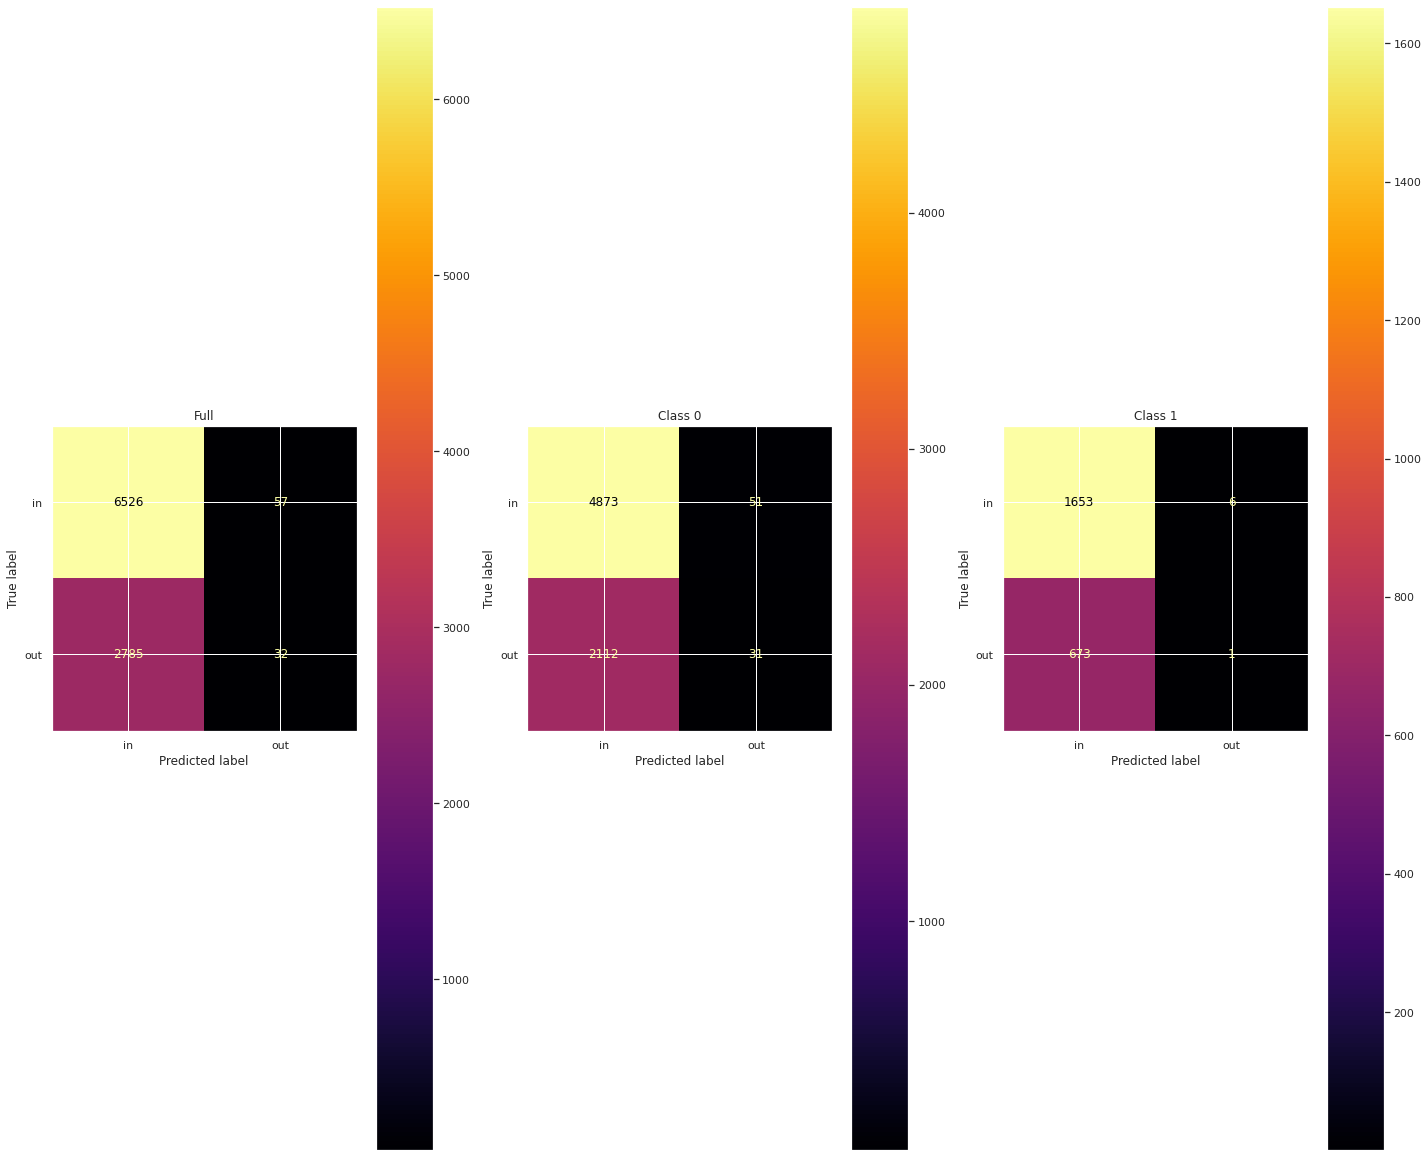

In [4]:
NOISY_BASE_PATH = Path("../../noisy_dataset/diva/experiment_output/")
noisy_3_std_0 = [load_pickle_bz2(NOISY_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
noisy_3_std_1 = [load_pickle_bz2(NOISY_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
noisy_ens_0 = HardVotingClassifier(noisy_3_std_0)
noisy_ens_1 = HardVotingClassifier(noisy_3_std_1)

evaluate_attack(noisy_ens_0, noisy_ens_1, BB, BB_DATA)

## Same as DT + $3$ std

report full
              precision    recall  f1-score   support

          in       0.65      0.06      0.12      6542
         out       0.30      0.92      0.45      2796

    accuracy                           0.32      9338
   macro avg       0.47      0.49      0.28      9338
weighted avg       0.54      0.32      0.22      9338


Class 0
              precision    recall  f1-score   support

          in       0.64      0.06      0.11      4899
         out       0.30      0.93      0.45      2128

    accuracy                           0.32      7027
   macro avg       0.47      0.49      0.28      7027
weighted avg       0.54      0.32      0.21      7027


Class 1
              precision    recall  f1-score   support

          in       0.65      0.08      0.15      1643
         out       0.28      0.89      0.43       668

    accuracy                           0.32      2311
   macro avg       0.47      0.49      0.29      2311
weighted avg       0.55      0.32      0.23 

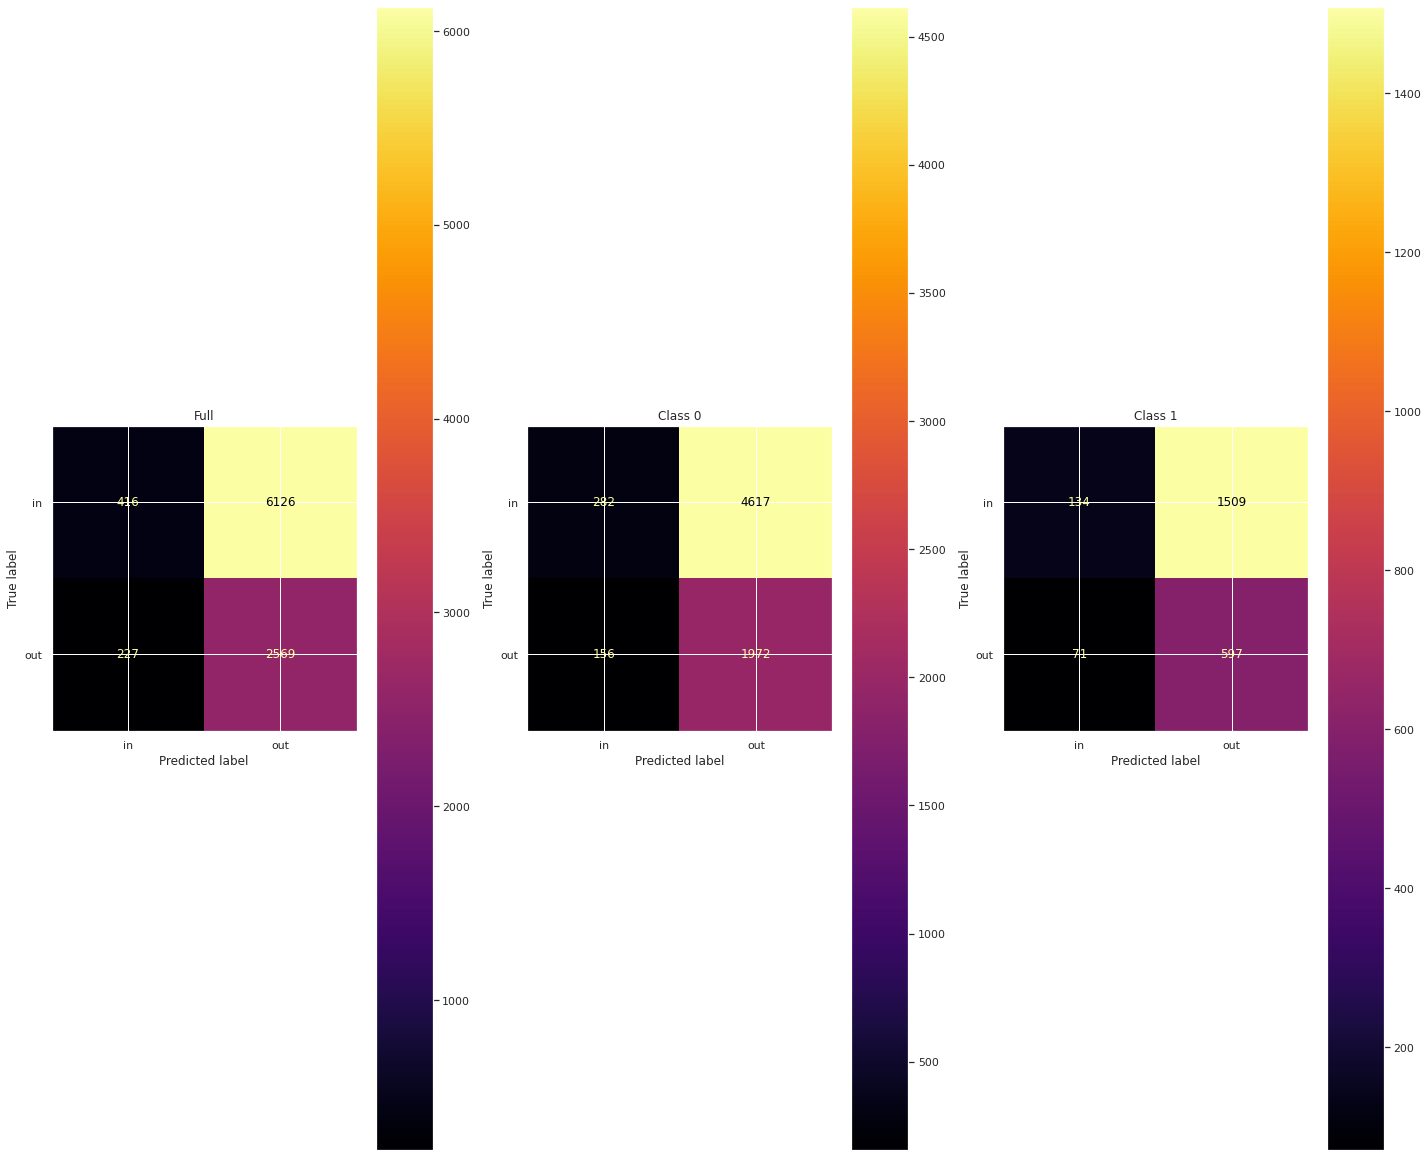

In [5]:
DT_STD_BASE_PATH = Path("../../decision_tree_dataset/diva/experiment_output/")
dt_3_std_0 = [load_pickle_bz2(DT_STD_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
dt_3_std_1 = [load_pickle_bz2(DT_STD_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
dt_std_ens_0 = HardVotingClassifier(dt_3_std_0)
dt_std_ens_1 = HardVotingClassifier(dt_3_std_1)

evaluate_attack(dt_std_ens_0, dt_std_ens_1, BB, BB_DATA)

## Same as DT without std

report full
              precision    recall  f1-score   support

          in       0.71      0.27      0.39      6539
         out       0.30      0.74      0.43      2801

    accuracy                           0.41      9340
   macro avg       0.50      0.50      0.41      9340
weighted avg       0.59      0.41      0.40      9340


Class 0
              precision    recall  f1-score   support

          in       0.68      0.03      0.06      4908
         out       0.30      0.97      0.46      2135

    accuracy                           0.31      7043
   macro avg       0.49      0.50      0.26      7043
weighted avg       0.56      0.31      0.18      7043


Class 1
              precision    recall  f1-score   support

          in       0.71      0.97      0.82      1631
         out       0.27      0.02      0.04       666

    accuracy                           0.70      2297
   macro avg       0.49      0.50      0.43      2297
weighted avg       0.58      0.70      0.60 

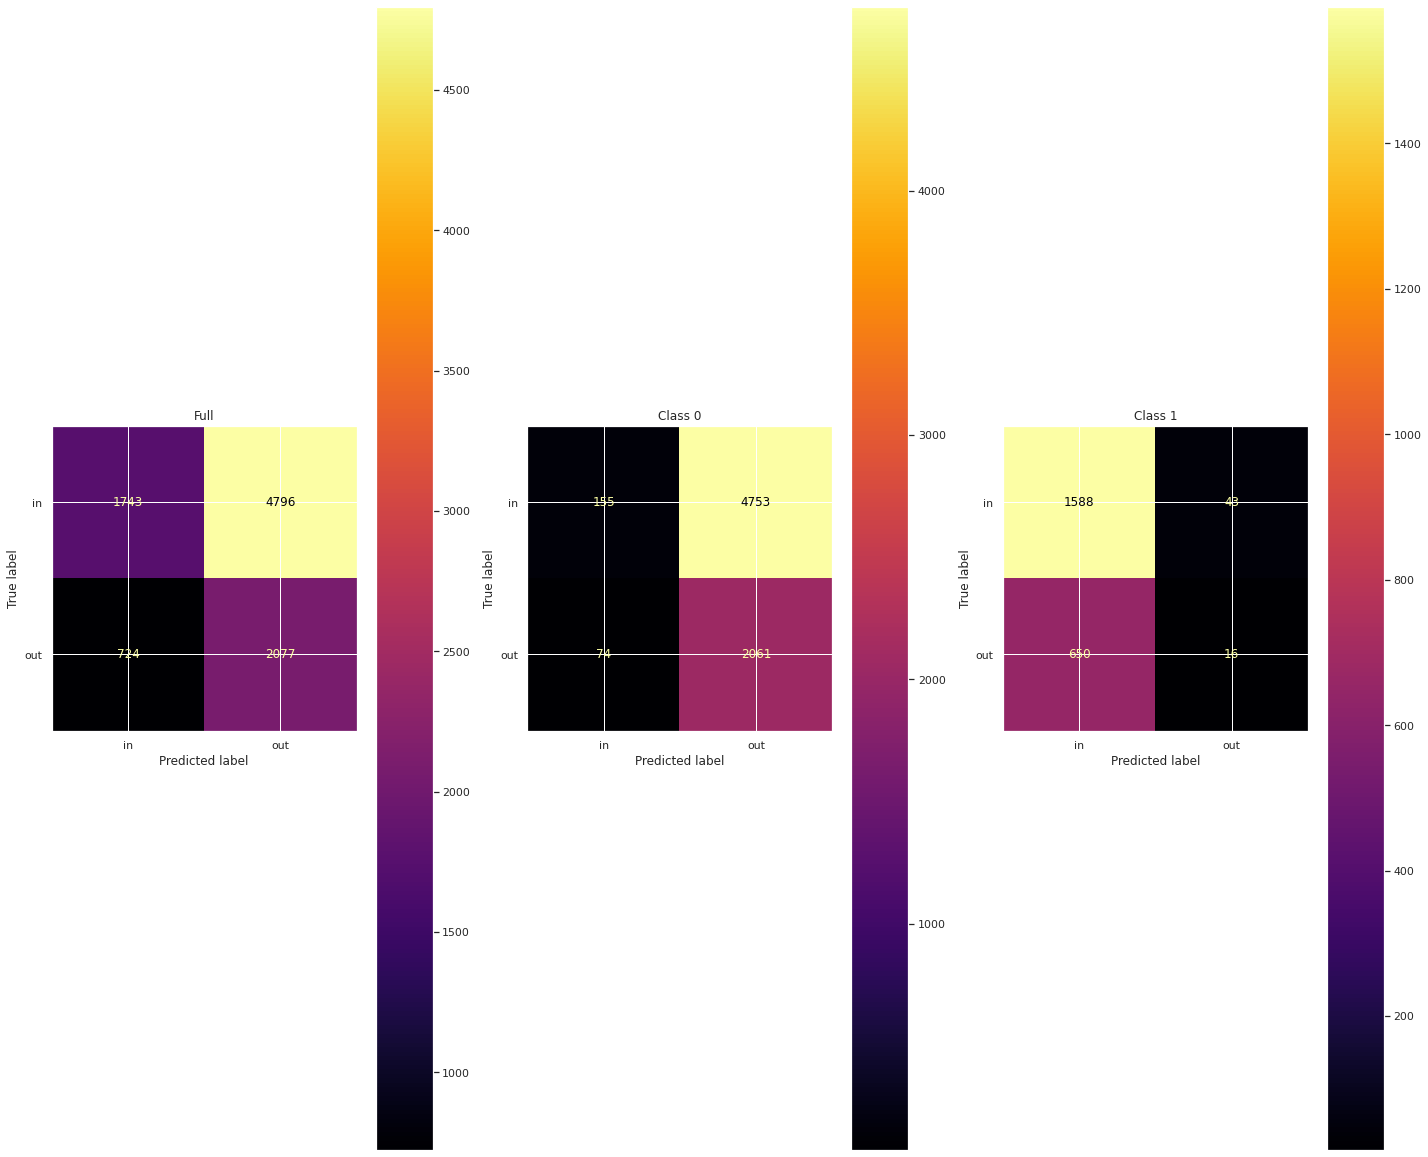

In [6]:
DT_BASE_PATH = Path("../../decision_tree_dataset_no3std/diva/experiment_output/")
dt_0 = [load_pickle_bz2(DT_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
dt_1 = [load_pickle_bz2(DT_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
dt_ens_0 = HardVotingClassifier(dt_0)
dt_ens_1 = HardVotingClassifier(dt_1)

evaluate_attack(dt_ens_0, dt_ens_1, BB, BB_DATA)